Import datasets from Kaggle directory of jaflaten
the datasets are 
- food-testing
- food-validation
- food-training


In [1]:
!ls /kaggle/input/food-training


annotations.json  images


In [2]:
from fastai.vision.all import *
import numpy as np
import pandas as pd
import random
from PIL import Image
import os
import json
from pathlib import Path

Download data - annotations er nøkkelordet i annotations.json, den har image_id og den har category_id  (image finnes også) 

In [3]:
#define paths

path_validation = Path("/kaggle/input/food-validation/images/")
path_training = Path("/kaggle/input/food-training/images/")

In [4]:
# Load annotations file
train_annotations_path = Path("/kaggle/input/food-training/annotations.json")
val_annotations_path = Path("/kaggle/input/food-validation/annotations.json")

with open(train_annotations_path) as f:
    train_annotations = json.load(f)
    
with open(val_annotations_path) as f:
    val_annotations = json.load(f)    

# Create a dictionary mapping category IDs to their names
categories = {}
for category in train_annotations["categories"]:
    categories[category["id"]] = category["name"]

In [5]:
with open(train_annotations_path) as json_data:
    data = json.load(json_data)
    df_train_annotations = pd.DataFrame(data['annotations'])
    
with open(val_annotations_path) as json_data:
    data = json.load(json_data)
    df_val_annotations = pd.DataFrame(data['annotations'])    

In [6]:
df_train_annotations.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,184135,131094,1352,"[[115.0, 206.5, 98.0, 204.5, 74.5, 182.0, 65.0, 167.5, 47.5, 156.0, 39.5, 137.0, 39.5, 130.0, 51.0, 118.5, 62.00000000000001, 112.5, 76.0, 113.5, 121.5, 151.0, 130.5, 169.0, 131.5, 185.0, 128.5, 195.0]]",5059.0,"[39.5, 39.5, 167.0, 92.0]",0
1,184136,131094,1893,"[[182.2599609375, 210.67999877929685, 58.6599609375, 227.4799987792969, 9.459960937500002, 229.8799987792969, 8.2599609375, 341.4799987792969, 14.2599609375, 375.07999877929694, 49.059960937499994, 355.87999877929684, 64.6599609375, 327.0799987792969, 93.4599609375, 307.8799987792969, 139.0599609375, 305.47999877929686, 178.65996093750002, 307.8799987792969, 195.4599609375, 303.0799987792969, 196.6599609375, 270.67999877929685, 182.2599609375, 232.27999877929685, 181.05996093750002, 227.4799987792969]]",18642.0,"[8.2599609375, 8.2599609375, 366.82003784179693, 188.39999999999998]",0
2,184138,131094,1310,"[[147.4599609375, 161.47999877929686, 165.4599609375, 171.0799987792969, 190.6599609375, 133.87999877929687, 200.2599609375, 155.47999877929686, 232.6599609375, 156.67999877929688, 241.05996093750002, 143.47999877929686, 227.85996093750003, 93.07999877929689, 196.6599609375, 46.27999877929688, 184.65996093750002, 23.479998779296878, 157.05996093750002, 29.479998779296874, 151.05996093750002, 54.679998779296874, 160.65996093750002, 91.87999877929688, 157.05996093750002, 90.67999877929688, 135.45996093750003, 73.87999877929688, 115.05996093750001, 71.47999877929688, 93.4599609375, 91.8799987...",12278.0,"[23.479998779296878, 86.25996093750001, 217.57996215820316, 154.8]",0
3,184139,131094,1565,"[[401.8599609375, 239.4799987792969, 350.25996093749995, 252.67999877929688, 345.4599609375, 265.8799987792969, 296.2599609375, 268.27999877929693, 257.85996093750003, 315.0799987792969, 243.4599609375, 357.0799987792969, 254.25996093749998, 400.2799987792969, 274.65996093750005, 438.6799987792969, 301.0599609375, 455.47999877929686, 329.85996093750003, 451.8799987792969, 356.2599609375, 427.8799987792969, 367.0599609375, 420.6799987792969, 399.4599609375, 436.27999877929693, 425.85996093750003, 429.0799987792969, 464.25996093750007, 390.6799987792969, 472.65996093750005, 339.0799987792969...",35610.0,"[239.4799987792969, 243.4599609375, 215.99999999999997, 229.20000000000005]",0
4,184988,131094,1264,"[[263.8599609375, 127.87999877929687, 290.2599609375, 168.67999877929685, 309.4599609375, 172.27999877929688, 337.0599609375, 149.4799987792969, 362.2599609375, 127.87999877929687, 370.65996093750005, 112.27999877929689, 357.4599609375, 94.27999877929688, 334.65996093750005, 84.67999877929688, 308.2599609375, 85.87999877929687, 287.85996093750003, 93.07999877929689, 281.85996093750003, 95.47999877929686]]",6071.0,"[127.87999877929687, 263.8599609375, 242.77996215820318, 106.80000000000007]",0


In [7]:
df_val_annotations.head()


,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,233459,149022,2504,"[[214.0, 152.5, 175.0, 144.5, 156.5, 133.0, 153.5, 119.0, 159.5, 99.0, 168.0, 89.5, 191.0, 77.5, 231.99999999999997, 73.5, 258.0, 80.5, 279.5, 95.0, 285.5, 104.0, 288.5, 122.0, 278.0, 137.5, 250.00000000000003, 148.5]]",8225.0,"[77.5, 153.5, 136.5, 135.0]",0
1,237814,149022,2131,"[[327.315625, 304.90686111450196, 83.890625, 271.919361114502, 65.690625, 361.78186111450196, 319.35312500000003, 409.556861114502, 320.49062499999997, 312.86936111450194]]",24367.0,"[65.690625, 65.690625, 261.625, 261.625]",0
2,127577,85697,2859,"[[455.0, 719.5, 359.0, 716.5, 342.0, 706.5, 308.0, 694.5, 286.0, 678.5, 249.49999999999997, 640.0, 233.5, 618.0, 226.49999999999997, 599.0, 214.5, 585.0, 196.5, 545.0, 193.5, 524.0, 183.5, 492.0, 181.5, 447.0, 184.5, 413.0, 201.5, 341.0, 228.5, 298.0, 264.0, 260.5, 284.0, 243.5, 321.0, 222.50000000000003, 389.0, 209.5, 420.0, 208.5, 516.0, 225.50000000000003, 548.0, 242.49999999999997, 573.0, 261.5, 622.5, 317.0, 654.5, 362.0, 658.5, 389.0, 658.5, 554.0, 652.5, 583.0, 637.5, 609.0, 601.5, 655.0, 580.0, 667.5, 568.0, 680.5, 547.0, 689.5, 531.0, 700.5, 510.0, 704.5, 494.00000000000006, 714.5...",197955.0,"[181.5, 181.5, 538.0, 477.0]",0
3,234263,147964,1402,"[[214.67346801757813, 481.7141965866089, 287.0734680175781, 592.5766965866089, 284.81096801757815, 678.5516965866088, 289.33596801757807, 707.9641965866089, 354.94846801757814, 692.1266965866089, 406.9859680175781, 649.1391965866088, 461.2859680175781, 621.989196586609, 486.17346801757816, 588.051696586609, 499.7484680175782, 511.1266965866089, 468.07346801757814, 427.4141965866089, 406.9859680175781, 382.1641965866089, 348.16096801757817, 402.52669658660886, 336.8484680175781, 407.0516965866089]]",56919.0,"[214.67346801757813, 214.67346801757813, 493.29072856903076, 285.07500000000005]",0
4,188824,134535,1024,"[[240.57000000000002, 604.89, 189.09, 555.39, 157.41, 501.93, 131.67000000000002, 434.60999999999996, 125.73, 371.25, 129.69, 319.77, 155.43, 268.29, 197.01, 214.82999999999998, 256.40999999999997, 187.10999999999999, 323.73, 159.39000000000001, 396.98999999999995, 141.57, 456.39000000000004, 147.51, 511.83, 183.15, 533.61, 234.63000000000002, 517.7700000000001, 282.15000000000003, 486.09000000000003, 335.61, 452.43, 395.01000000000005, 464.31000000000006, 438.57, 499.95, 452.43, 480.15, 472.22999999999996, 444.51000000000005, 464.31000000000006, 404.90999999999997, 450.45, 361.34999999999...",116244.0,"[125.73, 125.73, 479.15999999999997, 407.88]",0


In [8]:
df_annotations = pd.concat([df_train_annotations, df_val_annotations])

In [9]:
df_annotations.head()

,id,image_id,category_id,segmentation,area,bbox,iscrowd
0,184135,131094,1352,"[[115.0, 206.5, 98.0, 204.5, 74.5, 182.0, 65.0, 167.5, 47.5, 156.0, 39.5, 137.0, 39.5, 130.0, 51.0, 118.5, 62.00000000000001, 112.5, 76.0, 113.5, 121.5, 151.0, 130.5, 169.0, 131.5, 185.0, 128.5, 195.0]]",5059.0,"[39.5, 39.5, 167.0, 92.0]",0
1,184136,131094,1893,"[[182.2599609375, 210.67999877929685, 58.6599609375, 227.4799987792969, 9.459960937500002, 229.8799987792969, 8.2599609375, 341.4799987792969, 14.2599609375, 375.07999877929694, 49.059960937499994, 355.87999877929684, 64.6599609375, 327.0799987792969, 93.4599609375, 307.8799987792969, 139.0599609375, 305.47999877929686, 178.65996093750002, 307.8799987792969, 195.4599609375, 303.0799987792969, 196.6599609375, 270.67999877929685, 182.2599609375, 232.27999877929685, 181.05996093750002, 227.4799987792969]]",18642.0,"[8.2599609375, 8.2599609375, 366.82003784179693, 188.39999999999998]",0
2,184138,131094,1310,"[[147.4599609375, 161.47999877929686, 165.4599609375, 171.0799987792969, 190.6599609375, 133.87999877929687, 200.2599609375, 155.47999877929686, 232.6599609375, 156.67999877929688, 241.05996093750002, 143.47999877929686, 227.85996093750003, 93.07999877929689, 196.6599609375, 46.27999877929688, 184.65996093750002, 23.479998779296878, 157.05996093750002, 29.479998779296874, 151.05996093750002, 54.679998779296874, 160.65996093750002, 91.87999877929688, 157.05996093750002, 90.67999877929688, 135.45996093750003, 73.87999877929688, 115.05996093750001, 71.47999877929688, 93.4599609375, 91.8799987...",12278.0,"[23.479998779296878, 86.25996093750001, 217.57996215820316, 154.8]",0
3,184139,131094,1565,"[[401.8599609375, 239.4799987792969, 350.25996093749995, 252.67999877929688, 345.4599609375, 265.8799987792969, 296.2599609375, 268.27999877929693, 257.85996093750003, 315.0799987792969, 243.4599609375, 357.0799987792969, 254.25996093749998, 400.2799987792969, 274.65996093750005, 438.6799987792969, 301.0599609375, 455.47999877929686, 329.85996093750003, 451.8799987792969, 356.2599609375, 427.8799987792969, 367.0599609375, 420.6799987792969, 399.4599609375, 436.27999877929693, 425.85996093750003, 429.0799987792969, 464.25996093750007, 390.6799987792969, 472.65996093750005, 339.0799987792969...",35610.0,"[239.4799987792969, 243.4599609375, 215.99999999999997, 229.20000000000005]",0
4,184988,131094,1264,"[[263.8599609375, 127.87999877929687, 290.2599609375, 168.67999877929685, 309.4599609375, 172.27999877929688, 337.0599609375, 149.4799987792969, 362.2599609375, 127.87999877929687, 370.65996093750005, 112.27999877929689, 357.4599609375, 94.27999877929688, 334.65996093750005, 84.67999877929688, 308.2599609375, 85.87999877929687, 287.85996093750003, 93.07999877929689, 281.85996093750003, 95.47999877929686]]",6071.0,"[127.87999877929687, 263.8599609375, 242.77996215820318, 106.80000000000007]",0


In [10]:

# Define the get_label function
def get_label(image_filename):
    image_id = int(Path(image_filename).stem.lstrip("0"))
    return categories[df_annotations.loc[df_annotations['image_id'] == image_id]['category_id'].values[0]]
    

In [11]:
get_label("059339.jpg")

'chicken'

In [12]:
get_label("149022.jpg")

'espresso-with-caffeine'

In [13]:
df_train = pd.DataFrame(list(path_training.ls()), columns=["img"])
df_val = pd.DataFrame(list(path_validation.ls()), columns=["img"])

In [14]:
df_train["is_val"] = False

In [15]:
df_val["is_val"] = True

In [16]:
df = pd.concat([df_train, df_val])

In [17]:
df.head()

,img,is_val
0,/kaggle/input/food-training/images/059339.jpg,False
1,/kaggle/input/food-training/images/046754.jpg,False
2,/kaggle/input/food-training/images/089474.jpg,False
3,/kaggle/input/food-training/images/163198.jpg,False
4,/kaggle/input/food-training/images/104821.jpg,False


In [18]:
df.tail()

,img,is_val
995,/kaggle/input/food-validation/images/113903.jpg,True
996,/kaggle/input/food-validation/images/152275.jpg,True
997,/kaggle/input/food-validation/images/119913.jpg,True
998,/kaggle/input/food-validation/images/146957.jpg,True
999,/kaggle/input/food-validation/images/163225.jpg,True


In [19]:
df['label'] = df['img'].apply(get_label)

In [20]:
df.head()

,img,is_val,label
0,/kaggle/input/food-training/images/059339.jpg,False,chicken
1,/kaggle/input/food-training/images/046754.jpg,False,beer
2,/kaggle/input/food-training/images/089474.jpg,False,white-asparagus
3,/kaggle/input/food-training/images/163198.jpg,False,bread
4,/kaggle/input/food-training/images/104821.jpg,False,bread-sourdough


In [21]:
dls = ImageDataLoaders.from_df(df, label_col=2, valid_col=1, path="/",
                                item_tfms=Resize(460, method='squish'),
                                batch_tfms=aug_transforms(size=224, min_scale=0.75),
                                label_func=get_label)

In [22]:
#testing resize crop 
dls.train = dls.train.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

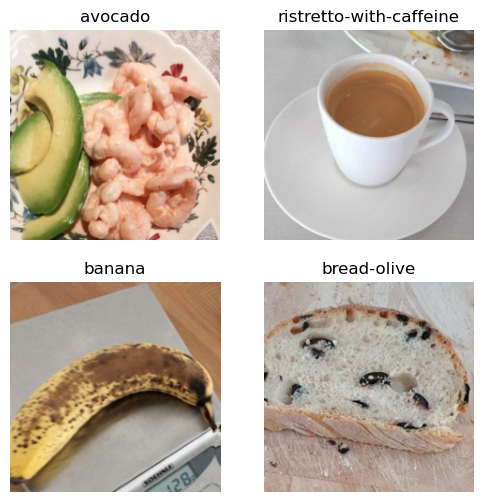

In [23]:
dls.show_batch(max_n=4)

In [24]:
import timm

In [25]:
??vision_learner()

Object `vision_learner()` not found.


In [26]:
#learner = vision_learner(dls, resnet34, metrics=accuracy)
learner = vision_learner(dls, 'convnext_small_in22k', metrics=accuracy).to_fp16()

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_small_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_small_22k_224.pth


SuggestedLRs(valley=0.0008317637839354575)

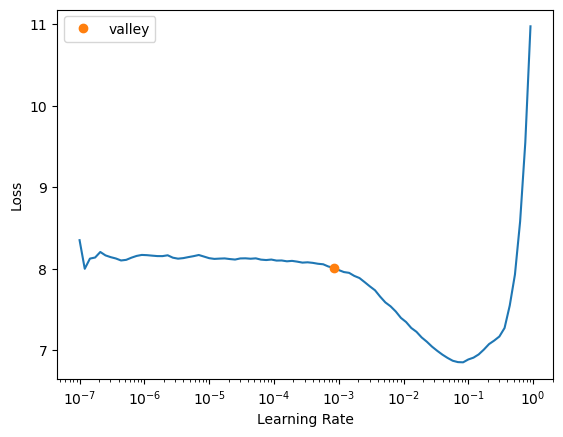

In [27]:
learner.lr_find()

In [28]:
learner.fine_tune(5, 0.001737800776027143)

epoch,train_loss,valid_loss,accuracy,time
0,2.725157,2.399547,0.472000,13:33


epoch,train_loss,valid_loss,accuracy,time
0,2.155049,2.111848,0.523000,12:53
1,2.046228,1.979874,0.527000,12:53
2,1.760196,1.880323,0.535000,12:54
3,1.507670,1.835736,0.533000,12:49
4,1.376824,1.833040,0.540000,12:52


In [29]:
# Define the learner
#vision learner instead?
#learn = cnn_learner(dls, resnet34, metrics=accuracy)

# Train the model
#learn.fine_tune(10)

In [30]:
learner.export(fname = '/kaggle/working/foodmodel.pkl')

In [31]:
?learner.export

In [32]:
!ls /kaggle/working


__notebook__.ipynb  foodmodel.pkl
